In [43]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 7.8 MB/s  0:00:04 eta 0:00:01


In [22]:
files_t1 = 'datasets/IXI/100_Guys/T1/NIfTI/IXI100-Guys-0747-T1.nii.gz'
img_t1 = nib.load(files_t1).get_fdata()

In [23]:
files_t2 = 'datasets/IXI/100_Guys/T2/NIfTI/IXI100-Guys-0747-T2.nii.gz'
img_t2 = nib.load(files_t2).get_fdata()

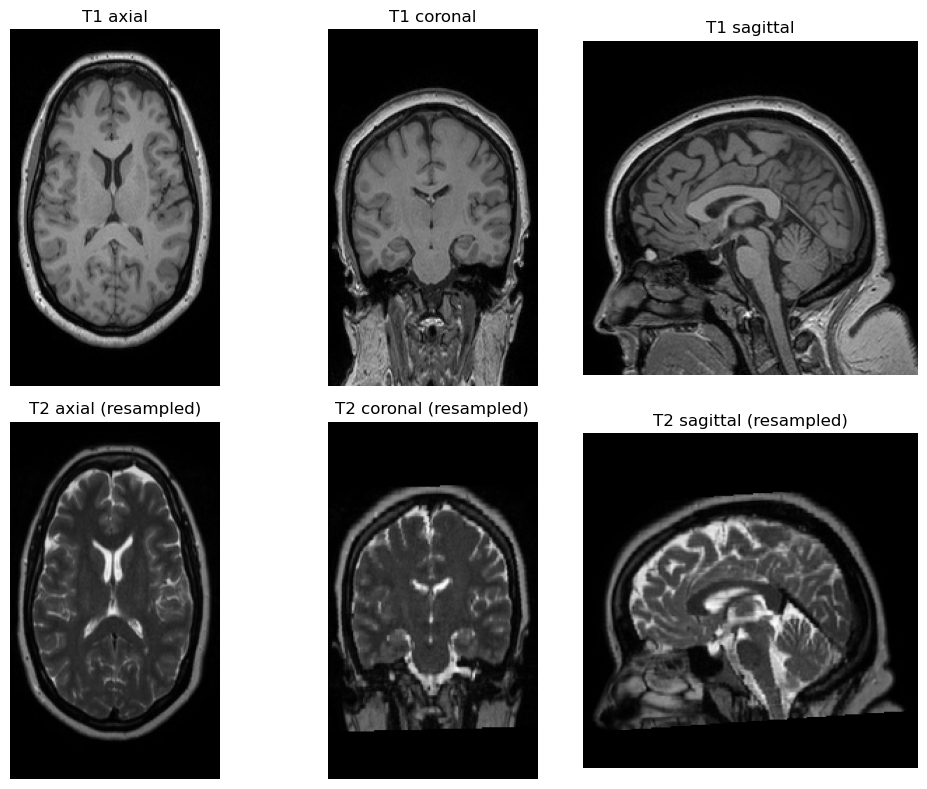

In [49]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

files_t1 = 'datasets/IXI/100_Guys/T1/NIfTI/IXI100-Guys-0747-T1.nii.gz'
files_t2 = 'datasets/IXI/100_Guys/T2/NIfTI/IXI100-Guys-0747-T2.nii.gz'

# Read as SimpleITK images
img1 = sitk.ReadImage(files_t1)
img2 = sitk.ReadImage(files_t2)

# Reorient both to a common orientation (RAS)
img1 = sitk.DICOMOrient(img1, 'RAS')
img2 = sitk.DICOMOrient(img2, 'RAS')

# Resample T2 into T1 space
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(img1)
resampler.SetInterpolator(sitk.sitkLinear)
img2_res = resampler.Execute(img2)

# Convert to NumPy (SimpleITK gives arrays as [z, y, x])
vol1 = sitk.GetArrayFromImage(img1)
vol2 = sitk.GetArrayFromImage(img2_res)

def show_slice_itk(vol, plane='axial', idx=None, title='', rotate=2):
    """
    Display a slice from a 3D volume.
    plane   : 'axial', 'coronal', or 'sagittal'
    idx     : slice index (default = middle)
    rotate  : number of 90° CCW rotations (0–3)
    """
    if plane == 'axial':      # z index
        k = vol.shape[0]//2 if idx is None else idx
        img = vol[k, :, :]
    elif plane == 'coronal':  # y index
        k = vol.shape[1]//2 if idx is None else idx
        img = vol[:, k, :]
    elif plane == 'sagittal': # x index
        k = vol.shape[2]//2 if idx is None else idx
        img = vol[:, :, k]
    else:
        raise ValueError("plane must be 'axial', 'coronal', or 'sagittal'")
    
    # rotate counter-clockwise (default 90°)
    img = np.rot90(img, k=rotate)
    
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,8))
plt.subplot(2,3,1); show_slice_itk(vol1,'axial',   title='T1 axial')
plt.subplot(2,3,2); show_slice_itk(vol1,'coronal', title='T1 coronal')
plt.subplot(2,3,3); show_slice_itk(vol1,'sagittal',title='T1 sagittal')
plt.subplot(2,3,4); show_slice_itk(vol2,'axial',   title='T2 axial (resampled)')
plt.subplot(2,3,5); show_slice_itk(vol2,'coronal', title='T2 coronal (resampled)')
plt.subplot(2,3,6); show_slice_itk(vol2,'sagittal',title='T2 sagittal (resampled)')
plt.tight_layout()
plt.show()

In [38]:
102_HH_slice27.npy

(150, 256, 256)

In [39]:
vol2.shape

(256, 256, 130)

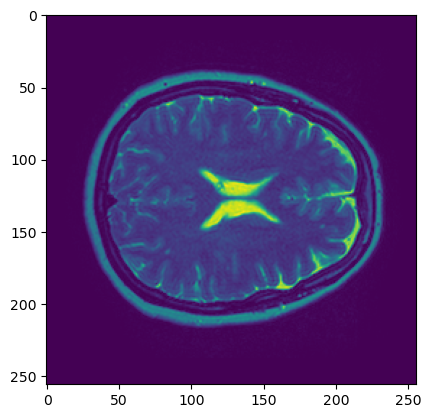

In [34]:
plt.imshow(img_t2[:,:,75])

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def compare_slices(file1, file2, titles=("Image 1", "Image 2"), cmap="gray"):
    """
    Load and display two .npy slice files side by side.
    """
    # Load .npy arrays
    img1 = np.load(file1)
    img2 = np.load(file2)

    # Plot side-by-side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap=cmap)
    plt.title(titles[0])
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=cmap)
    plt.title(titles[1])
    plt.axis("off")

    plt.tight_layout()
    plt.show()

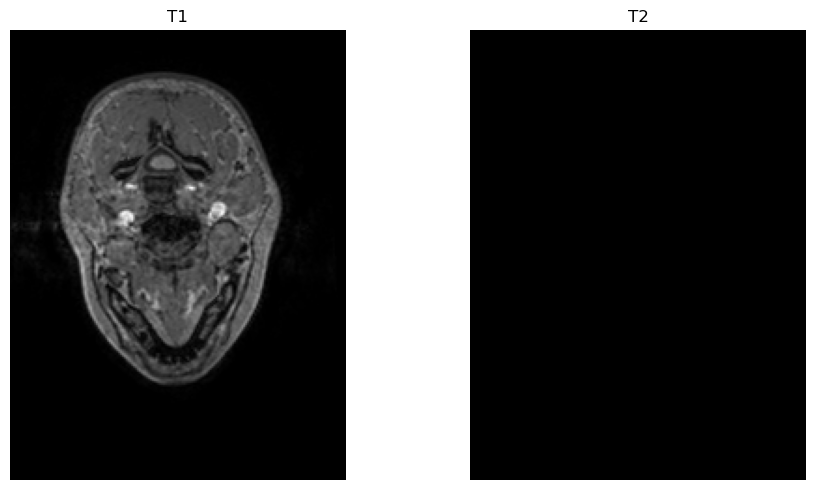

In [69]:

file1="datasets/IXI_processed/t1/train/102_HH_slice27.npy"
file2="datasets/IXI_processed/t2/train/102_HH_slice27.npy"
compare_slices(file1, file2, titles=("T1", "T2"))

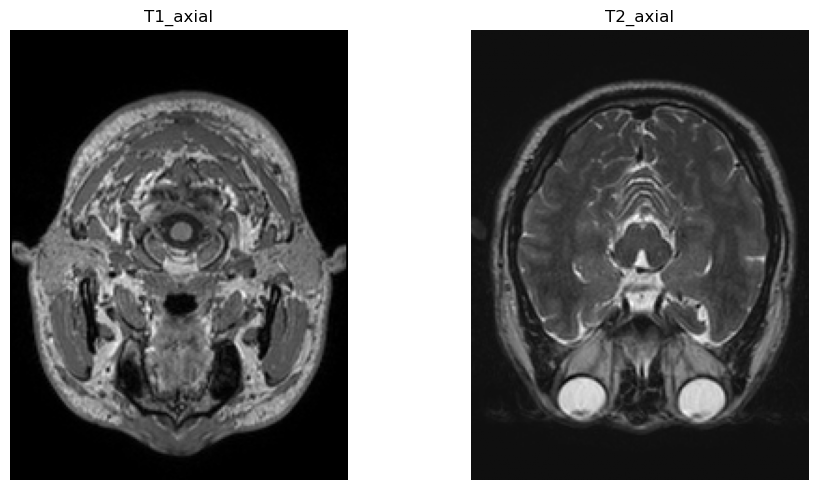

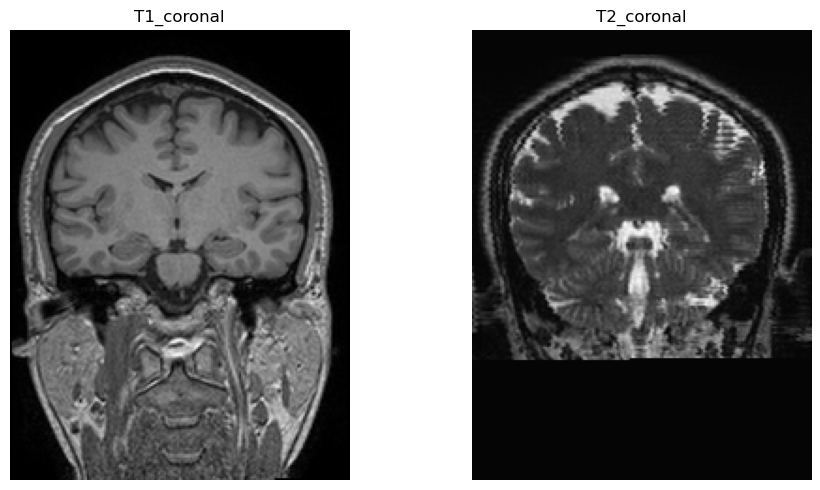

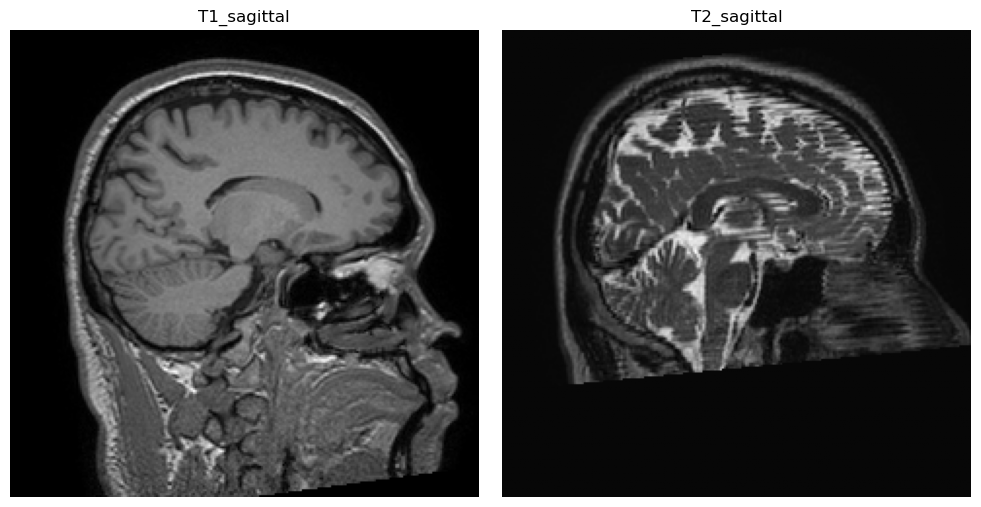

In [70]:
filename = "110_Guys"
root_dir = "datasets/IXI_processed/"

for i in ('_axial','_coronal','_sagittal'):
    file1= root_dir + "t1/test/" + filename +i+".npy"
    file2= root_dir + "t2/test/" + filename +i+".npy"    
    compare_slices(file1, file2, titles=("T1"+i, "T2"+i))

In [59]:
file1+"axial"+".npy"

'datasets/IXI_processed/t1/test/100_Guys_axial.npyaxial.npy'

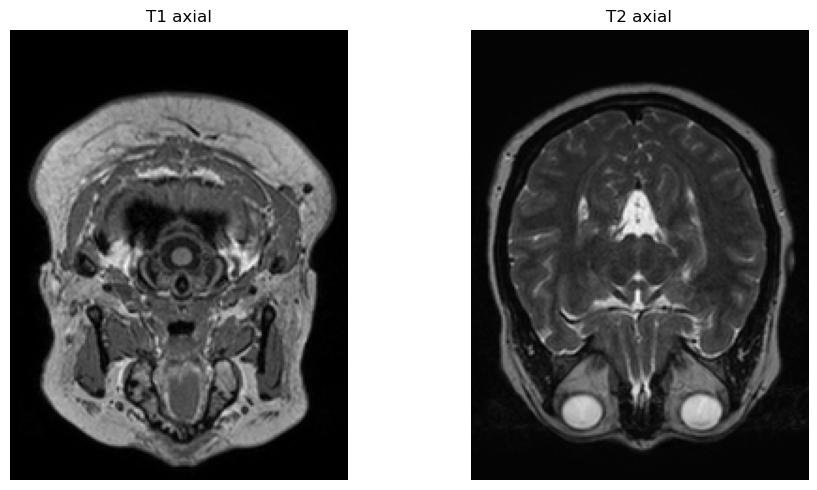

In [57]:
# Example usage:
file1 = "datasets/IXI_processed/t1/test/100_Guys_axial.npy"
file2 = "datasets/IXI_processed/t2/test/100_Guys_axial.npy"

compare_slices(file1, file2, titles=("T1 axial", "T2 axial"))

/var/folders/_z/cqn10_013jl35fq5y4lwsh8h0000gn/T/ipykernel_49320/2016905196.py:48: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  t2_img_res = resample_to_img(t2_img, t1_img, interpolation='continuous')
/var/folders/_z/cqn10_013jl35fq5y4lwsh8h0000gn/T/ipykernel_49320/2016905196.py:48: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  t2_img_res = resample_to_img(t2_img, t1_img, interpolation='continuous')


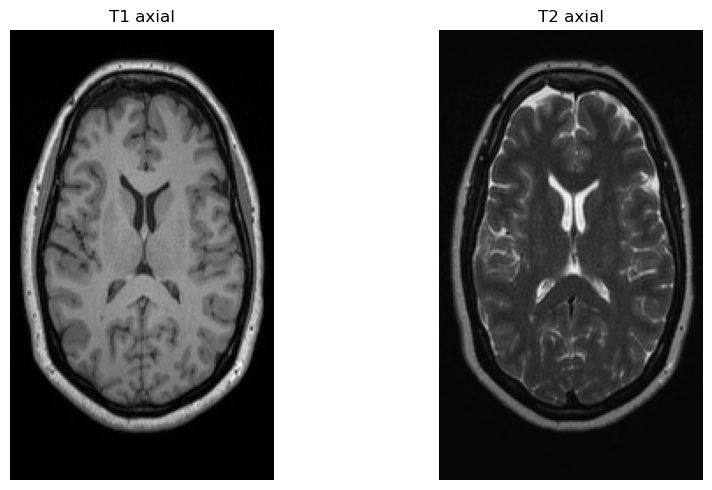

In [51]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn.image import resample_to_img  # pip install nilearn

t1_path = 'datasets/IXI/100_Guys/T1/NIfTI/IXI100-Guys-0747-T1.nii.gz'
t2_path = 'datasets/IXI/100_Guys/T2/NIfTI/IXI100-Guys-0747-T2.nii.gz'

def load_as_ras(path):
    """Load NIfTI and reorient axes to RAS."""
    img = nib.load(path)
    return nib.as_closest_canonical(img)

def extract_slice(vol, plane='axial', idx=None, rotate=1, normalize=True):
    """
    vol: 3D numpy array
    plane: 'axial' (z), 'coronal' (y), 'sagittal' (x)
    idx: slice index (default = middle)
    rotate: 0..3 (90° CCW steps) for display consistency
    normalize: scale to [0,1] for nicer viewing
    """
    if plane == 'axial':      # k = z
        k = vol.shape[2]//2 if idx is None else idx
        sl = vol[:, :, k]
    elif plane == 'coronal':  # k = y
        k = vol.shape[1]//2 if idx is None else idx
        sl = vol[:, k, :]
    elif plane == 'sagittal': # k = x
        k = vol.shape[0]//2 if idx is None else idx
        sl = vol[k, :, :]
    else:
        raise ValueError("plane must be 'axial', 'coronal', or 'sagittal'")
    sl = np.rot90(sl, k=rotate)   # ensure same visual orientation
    if normalize:
        vmin, vmax = sl.min(), sl.max()
        if vmax > vmin:
            sl = (sl - vmin) / (vmax - vmin)
        else:
            sl = sl - vmin
    return sl

def compare_t1_t2(t1_path, t2_path, plane='axial', idx=None, rotate=1):
    # 1) Load & canonicalize
    t1_img = load_as_ras(t1_path)
    t2_img = load_as_ras(t2_path)

    # 2) Resample T2 to T1’s space (so voxel grid matches)
    t2_img_res = resample_to_img(t2_img, t1_img, interpolation='continuous')

    # 3) Get arrays
    v1 = t1_img.get_fdata()
    v2 = t2_img_res.get_fdata()

    # 4) Extract the same plane from both
    s1 = extract_slice(v1, plane=plane, idx=idx, rotate=rotate)
    s2 = extract_slice(v2, plane=plane, idx=idx, rotate=rotate)

    # 5) Show side-by-side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1); plt.imshow(s1, cmap='gray'); plt.title(f"T1 {plane}"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(s2, cmap='gray'); plt.title(f"T2 {plane}"); plt.axis('off')
    plt.tight_layout(); plt.show()

# Use the same plane for both modalities, e.g. axial:
compare_t1_t2(t1_path, t2_path, plane='axial')
# Try coronal or sagittal too:
# compare_t1_t2(t1_path, t2_path, plane='sagittal')
# compare_t1_t2(t1_path, t2_path, plane='coronal')